In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import RectBivariateSpline
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale, rotate

In [5]:
from skimage import transform


In [6]:
# dir(transform)

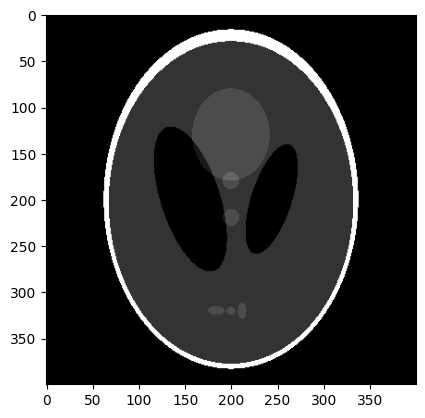

In [7]:
image = shepp_logan_phantom()
plt.imshow(shepp_logan_phantom(), cmap='gray')

In [8]:
_ = np.linspace(-1, 1, image.shape[0])
xv, yv = np.meshgrid(_,_)
image[(xv-0.1)**2+(yv-0.2)**2<0.01] = 2
# Create a rotated image
image_rot = rotate(image, 45)

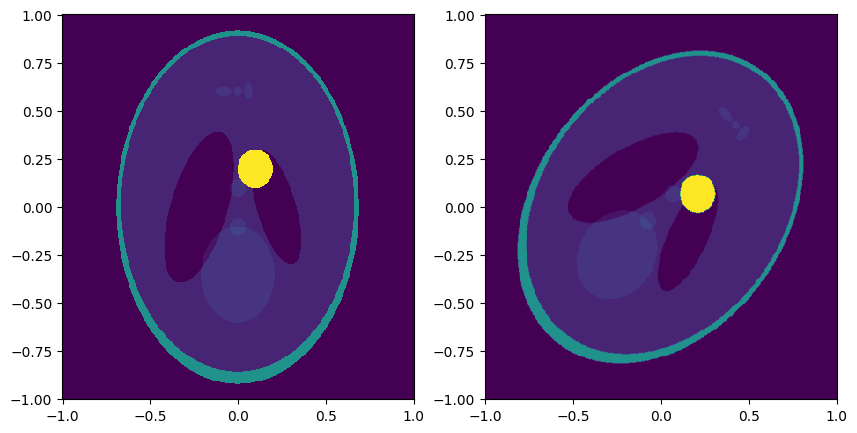

In [9]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].pcolor(xv,yv,image, shading='auto')
ax[1].pcolor(xv,yv,image_rot, shading='auto')
plt.show()

In [2]:
thetas = np.arange(0,180,0.5) * np.pi/180
rs = _
dtheta = np.diff(thetas)[0]
dr = np.diff(rs)[0]
# rotations = np.array([rotate(image, theta*180/np.pi) for theta in thetas])

ValueError: diff requires input that is at least one dimensional

In [11]:
p = np.array([rotation.sum(axis=0)*dr for rotation in rotations]).T

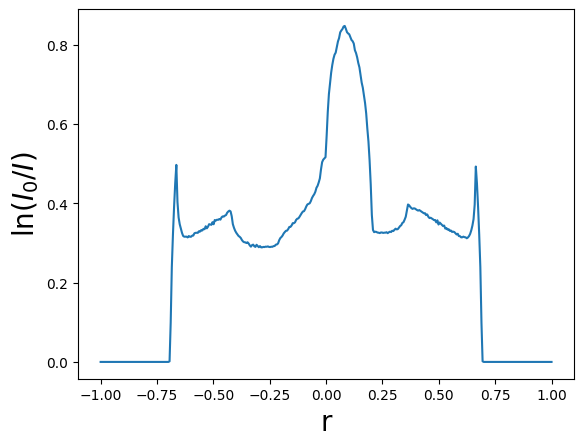

In [12]:
plt.plot(rs, p[:,1])
plt.xlabel('r', fontsize=20)
plt.ylabel('$\ln(I_0/I)$', fontsize=20)
plt.show()

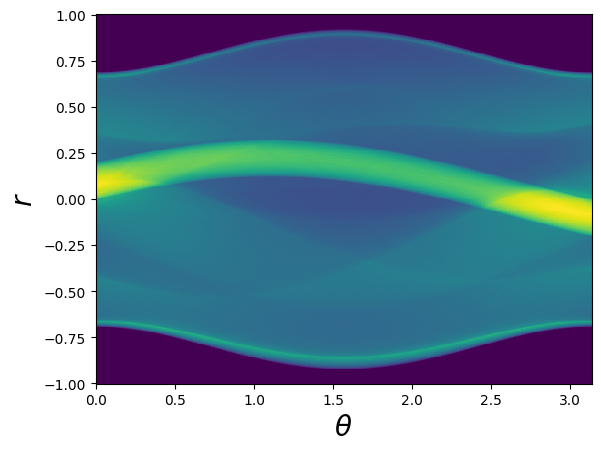

In [13]:
plt.pcolor(thetas, rs, p, shading='auto')
plt.xlabel(r'$\theta$', fontsize=20)
plt.ylabel('$r$', fontsize=20)
plt.show()

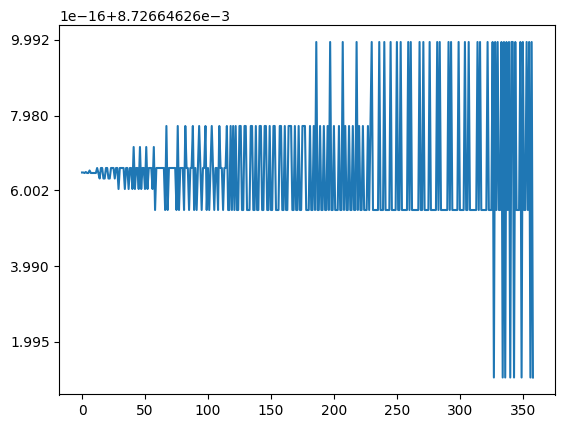

In [5]:
plt.plot(np.diff(thetas))

In [6]:
p_interp = RectBivariateSpline(rs, thetas, p)

NameError: name 'p' is not defined

In [15]:
def get_fBP(x,y):
    return p_interp(x*np.cos(thetas)+y*np.sin(thetas), thetas, grid=False).sum() * dtheta

fBP = np.vectorize(get_fBP)(xv,yv)

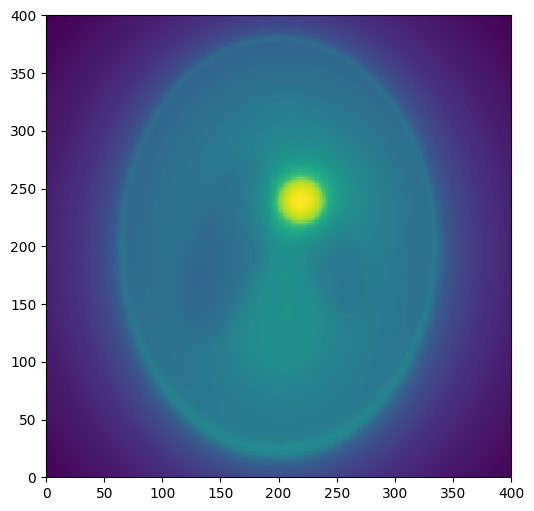

In [16]:
plt.figure(figsize=(6,6))
plt.pcolor(fBP)
plt.show()

In [17]:
from scipy.fft import fft, ifft

In [18]:
P = fft(p, axis=0)
nu = np.fft.fftfreq(P.shape[0], d=np.diff(rs)[0])
P.T.shape

(360, 400)

In [19]:
integrand = P.T * np.abs(nu)
integrand = integrand.T
p_p = np.real(ifft(integrand, axis=0))

In [20]:
p_p_interp = RectBivariateSpline(rs, thetas, p_p)

In [21]:
def get_f(x,y):
    return p_p_interp(x*np.cos(thetas)+y*np.sin(thetas), thetas, grid=False).sum() * dtheta
f = np.vectorize(get_f)(xv,yv)

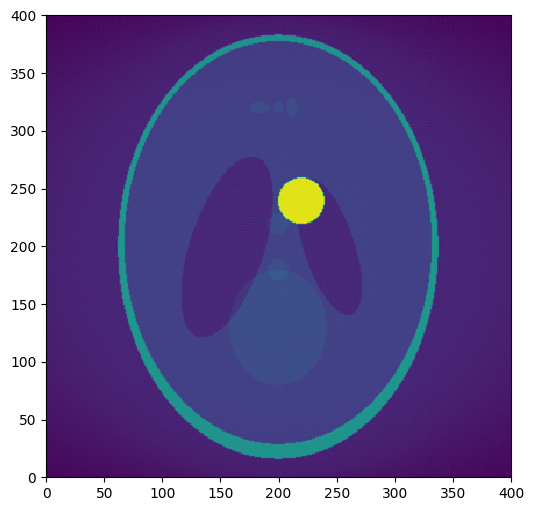

In [22]:
plt.figure(figsize=(6,6))
plt.pcolor(f)
plt.show()

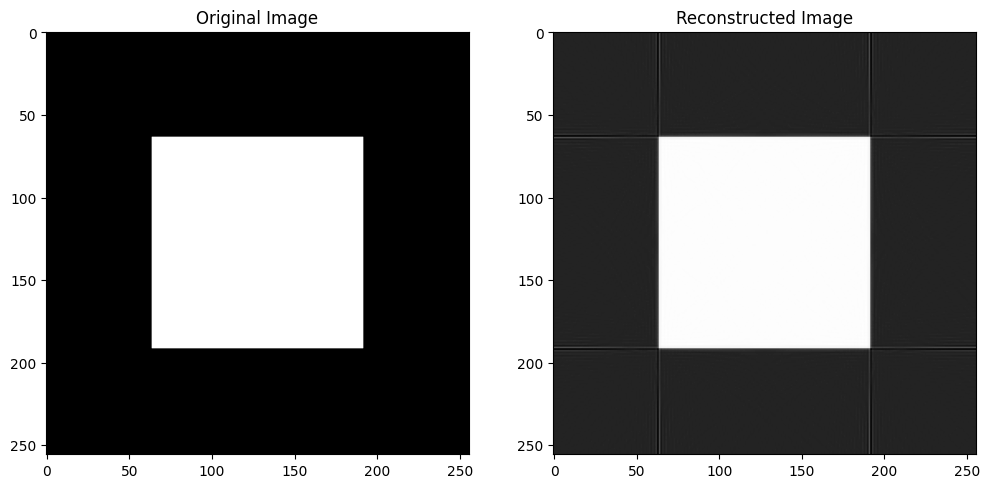

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon, iradon

# Generate a test image
image_size = 256
theta = np.linspace(0., 180., max(image_size, 180), endpoint=False)
image = np.zeros((image_size, image_size))
image[image_size // 4:-image_size // 4, image_size // 4:-image_size // 4] = 1.

# Perform the fanbeam transform (Radon transform)
projection = radon(image, theta=theta, circle=False)

# Perform the inverse transform (iradon) to reconstruct the image
reconstructed_image = iradon(projection, theta=theta, circle=False)

# Display the original image and reconstructed image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_title('Original Image')
ax1.imshow(image, cmap=plt.cm.Greys_r)
ax2.set_title('Reconstructed Image')
ax2.imshow(reconstructed_image, cmap=plt.cm.Greys_r)
plt.show()


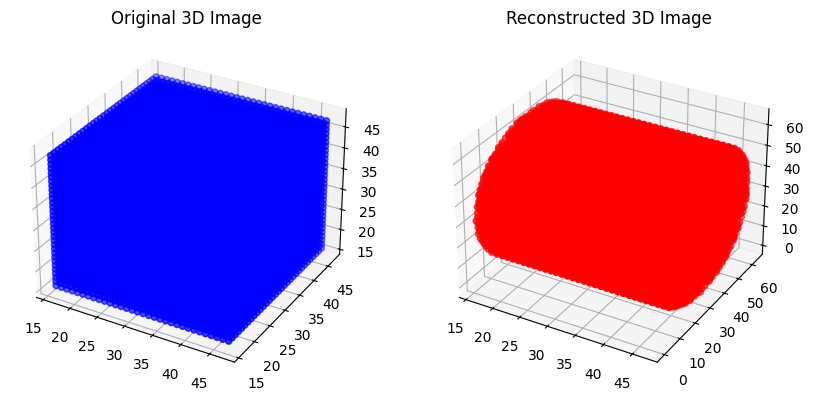

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon, iradon

# Generate a test 3D image (cube)
size = 64
cube = np.zeros((size, size, size))
cube[size//4:-size//4, size//4:-size//4, size//4:-size//4] = 1.

# Define projection angles
theta = np.linspace(0., 180., max(cube.shape[1], cube.shape[2]), endpoint=False)

# Initialize empty array for reconstructed volume
reconstructed_volume = np.zeros_like(cube)

# Iterate through each slice of the cube and perform 2D reconstruction
for i in range(cube.shape[0]):
    # Generate 2D projections from the current slice
    projections = radon(cube[i], theta=theta, circle=True)
    # Reconstruct 2D slice using filtered back projection (FBP)
    reconstructed_slice = iradon(projections, theta=theta, circle=True)
    # Store reconstructed slice in the volume
    reconstructed_volume[i] = reconstructed_slice

# Plot the original and reconstructed 3D images
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title('Original 3D Image')
ax1.scatter(*np.where(cube), c='blue')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.set_title('Reconstructed 3D Image')
ax2.scatter(*np.where(reconstructed_volume > 0), c='red')

plt.show()
